In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,1.0,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,1.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0


Will start with LR model including all columns except target. 

In [8]:
y = df['price']
X = df.drop('price', axis = 1)

In [9]:
multi_baseline = sm.OLS(y, sm.add_constant(X)).fit()
multi_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2707.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:40:58   Log-Likelihood:            -2.9550e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21580   BIC:                         5.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.515e+06   3.07e+06     -1.146      0.252   -9.53e+06     2.5e+06
bedrooms          -4.473e+04   1991.177    -22.462      0.000   -4.86e+04   -4.08e+04
bathrooms          4.364e+04   3434.785     12.706      0.000    3.69e+04    5.04e+04
sqft_living         120.7104      2.385     50.614      0.000     116.036     125.385
sqft_lot              0.1525      0.050      3.024      0.002       0.054       0.251
floors             1.079e+04   3790.194      2.846      0.004    3356.293    1.82e+04
sqft_above           65.2782      2.359     27.676      0.000      60.655      69.901
yr_built          -2862.2112     75.442    -37.939      0.000   -3010.083   -2714.340
yr_renovated         33.4956      4.183      8.007      0.000      25.296      41.695
zipcode            -494.3420     34.598    -14.288      0.000    -562.157    -426.527
lat                5.587e+05   1.13e+04     49.665      0.000    5.37e+05    5.81e+05
long              -2.507e+05   1.38e+04    -18.123      0.000   -2.78e+05   -2.24e+05
sqft_living15        38.2225      3.586     10.658      0.000      31.193      45.252
sqft_lot15           -0.3293      0.077     -4.264      0.000      -0.481      -0.178
sqft_basment_calc    55.4260      2.746     20.183      0.000      50.043      60.809
grades             1.023e+05   2267.364     45.105      0.000    9.78e+04    1.07e+05
waterfront         7.853e+04   4146.831     18.938      0.000    7.04e+04    8.67e+04
condition          2.877e+04   2470.161     11.646      0.000    2.39e+04    3.36e+04
==============================================================================
Omnibus:                    18974.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799561.443
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      47.070   Cond. No.                     2.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Initial interpretations: 
- R2 value increased as expected. It increased from 49% in SLR baseline to 67%. 
- p-values are < 0.05 for all variables. 
- will need to examine issues of multicollinearity as Cond. No. is very large. 

## Exploring multicollinearity 

In [22]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [23]:
#code from multicollinearity lab

df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))
df_multico.set_index(['pairs'], inplace = True)
df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']
df_multico.drop_duplicates(inplace=True)
df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grades, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grades, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


- though sq ft living is the highest correlated it is highly correlated with severeal other variabl

In [24]:
X_dropped = df.drop(columns=['price', 'sqft_above'], axis = 1)

In [25]:
results_dropped = sm.OLS(y, sm.add_constant(X_dropped)).fit()
results_dropped.summary()
# MC actually went up
# X_dropped = df.drop(columns=['price', 'sqft_above', 'sqft_living15',
#                              'grades', 'sqft_living', 'bathrooms'], axis = 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2707.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:            -2.9550e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21580   BIC:                         5.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.515e+06   3.07e+06     -1.146      0.252   -9.53e+06     2.5e+06
bedrooms          -4.473e+04   1991.177    -22.462      0.000   -4.86e+04   -4.08e+04
bathrooms          4.364e+04   3434.785     12.706      0.000    3.69e+04    5.04e+04
sqft_living         185.9887      3.869     48.077      0.000     178.406     193.571
sqft_lot              0.1525      0.050      3.024      0.002       0.054       0.251
floors             1.079e+04   3790.194      2.846      0.004    3356.293    1.82e+04
yr_built          -2862.2112     75.442    -37.939      0.000   -3010.083   -2714.340
yr_renovated         33.4956      4.183      8.007      0.000      25.296      41.695
zipcode            -494.3420     34.598    -14.288      0.000    -562.157    -426.527
lat                5.587e+05   1.13e+04     49.665      0.000    5.37e+05    5.81e+05
long              -2.507e+05   1.38e+04    -18.123      0.000   -2.78e+05   -2.24e+05
sqft_living15        38.2225      3.586     10.658      0.000      31.193      45.252
sqft_lot15           -0.3293      0.077     -4.264      0.000      -0.481      -0.178
sqft_basment_calc    -9.8522      4.530     -2.175      0.030     -18.731      -0.973
grades             1.023e+05   2267.364     45.105      0.000    9.78e+04    1.07e+05
waterfront         7.853e+04   4146.831     18.938      0.000    7.04e+04    8.67e+04
condition          2.877e+04   2470.161     11.646      0.000    2.39e+04    3.36e+04
==============================================================================
Omnibus:                    18974.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799561.443
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      47.070   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# code by Aniruddha Bhandari
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(X_dropped)

,variables,VIF
0,bedrooms,2.321412e+01
1,bathrooms,2.874532e+01
2,sqft_living,3.710469e+01
3,sqft_lot,2.372765e+00
4,floors,1.688569e+01
5,yr_built,9.230190e+03
6,yr_renovated,1.151178e+00
7,zipcode,1.634973e+06
8,lat,1.376308e+05
9,long,1.359686e+06


In [27]:
X_dropped_vif = df.drop(columns=['price', 'sqft_above', 'zipcode'], axis = 1)

In [28]:
results_dropped_vif = sm.OLS(y, sm.add_constant(X_dropped_vif)).fit()
results_dropped_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2847.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:56:05   Log-Likelihood:            -2.9560e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.032e+07   1.68e+06    -24.067      0.000   -4.36e+07    -3.7e+07
bedrooms          -4.312e+04   1997.334    -21.588      0.000    -4.7e+04   -3.92e+04
bathrooms          4.451e+04   3450.372     12.901      0.000    3.77e+04    5.13e+04
sqft_living         184.5464      3.885     47.498      0.000     176.931     192.162
sqft_lot              0.1494      0.051      2.948      0.003       0.050       0.249
floors             5595.9559   3790.467      1.476      0.140   -1833.640     1.3e+04
yr_built          -2716.9115     75.104    -36.175      0.000   -2864.121   -2569.702
yr_renovated         34.4626      4.202      8.201      0.000      26.226      42.699
lat                5.245e+05    1.1e+04     47.493      0.000    5.03e+05    5.46e+05
long              -1.659e+05   1.26e+04    -13.217      0.000   -1.91e+05   -1.41e+05
sqft_living15        42.3364      3.591     11.788      0.000      35.297      49.376
sqft_lot15           -0.3394      0.078     -4.375      0.000      -0.491      -0.187
sqft_basment_calc   -12.3225      4.548     -2.710      0.007     -21.237      -3.408
grades             1.032e+05   2277.106     45.313      0.000    9.87e+04    1.08e+05
waterfront         7.727e+04   4165.366     18.552      0.000    6.91e+04    8.54e+04
condition          3.263e+04   2466.827     13.229      0.000    2.78e+04    3.75e+04
==============================================================================
Omnibus:                    19098.414   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1822838.122
Skew:                           3.835   Prob(JB):                         0.00
Kurtosis:                      47.349   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Floors is longer 

***

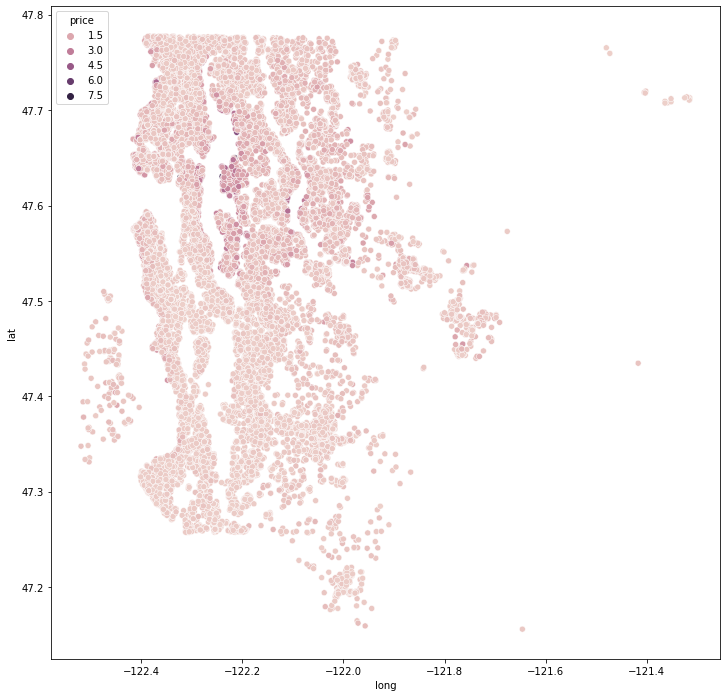

In [15]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=df,
               hue='price');


In [ ]:
## how can this tie to zip code? it does appear that higher priced houses are on the water